In [1]:
import matplotlib    # Library used for plotting
import numpy as np   # Numerical library
import matplotlib.pyplot as plt # Plot commands
import functools
import pandas as pd
import itertools
import math as m
import matplotlib.patches as mpatches

 
from matplotlib import rc
# rc('text', usetex = True)
# rc('font', size = 12, family = 'Times New Roman')
 
# Define some colors using the RGB format
my_lilac = (169/255,89/255,201/255);
my_blue = (50/255,120/255,218/255);
my_green = (106/255,178/255,71/255);
my_orange = (209/255,135/255,46/255);
my_red = (215/255,67/255,84/255);



```
# This is formatted as code
```

# Part I

In [2]:
#Generate 2D dataframe to house all possible macrostates
#Boundary values have been included
States=pd.DataFrame((np.zeros([32,7])));
States[[0,6]]=1;
States.head(32)
#Fill our dataframe with all possible flip configurations iteratively.
jj=0
for ii in itertools.product([-1,1],repeat=5):
    States.loc[jj,1:5] = np.array(list(ii))
    jj=jj+1
#Have a quick look
States.head()

,0,1,2,3,4,5,6
0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
1,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
2,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0
3,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
4,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0


In [3]:
#We need to write a function that calculates the energy of each microstate.
def energy(Test,J):
    E=0
    for ii in range(0,len(Test)-1):
        E+=(-J*Test[ii]*Test[ii+1]) +0.4*J*Test[ii]
    return E - 0.4*J #We subtract 0.4*J to correct for the boundary term which is always 1

In [4]:
#We test this for one of our microstates above setting J=1
Test=np.array(States.iloc[1])
print('Microstate='+str(Test))
print('Energy(calculated by hand)= -3.2')
print('Output from function= '+str(energy(Test,1)))

Microstate=[ 1. -1. -1. -1. -1.  1.  1.]
Energy(calculated by hand)= -3.2
Output from function= -3.1999999999999997


In [5]:
#We need the partition function Q
def partition(States,J):
    States['E'] = States.apply(lambda row : energy(row[0:7],J), axis = 1)
    Energies=np.array(States['E'])
    Q=0
    for ii in range(0,len(Energies)):
        Q+=m.exp(-Energies[ii])
    return States,Q

#To calculate the probability of N occupied spots, we truncate our states to only those with the appropriate number of spots
def truncate(States,N):
    States['N']=States.apply(lambda row: (sum(row[0:7])+3)/2,axis=1)
    truncated = States[States['N']==N]
    return truncated

#Now we calculate the probability of having N occupied spots
def Probability(States,J,N):
    (E_states,Q)=partition(States,J)
    Truncated=truncate(E_states,N)
    Energies=np.array(Truncated['E'])
    E_N=0
    for ii in range(0,len(Energies)):
        E_N+=m.exp(-Energies[ii])
    return E_N/Q

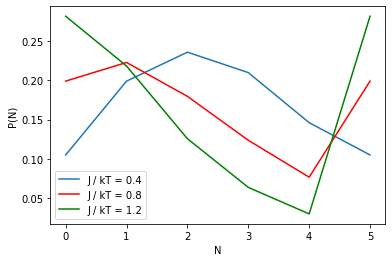

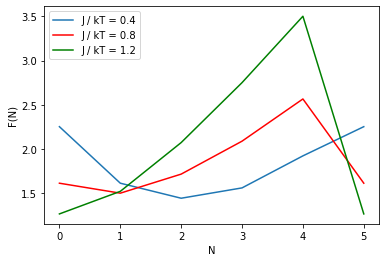

In [6]:
def Prob_distribution(J):
    P_N=np.zeros(6)
    for ii in range(0,6):
        P_N[ii]=Probability(States,J,ii)
    return P_N

fig, ax = plt.subplots()
ax.plot(range(0,6),Prob_distribution(0.4), label = "J / kT = 0.4")
ax.plot(range(0,6),Prob_distribution(0.8), 'r', label = "J / kT = 0.8")
ax.plot(range(0,6),Prob_distribution(1.2), 'g', label = "J / kT = 1.2")
plt.ylabel("P(N)")
plt.xlabel("N")
leg = ax.legend();


def Free_energy_distribution(J):
    P_N=np.zeros(6)
    for ii in range(0,6):
        P_N[ii]=-m.log(Probability(States,J,ii))
    return P_N

fig, ax = plt.subplots()

ax.plot(range(0,6),Free_energy_distribution(0.4), label = "J / kT = 0.4")
ax.plot(range(0,6),Free_energy_distribution(0.8), 'r', label = "J / kT = 0.8")
ax.plot(range(0,6),Free_energy_distribution(1.2), 'g', label = "J / kT = 1.2")

plt.ylabel("F(N)")
plt.xlabel("N")
leg = ax.legend();



In [7]:
# #Probability distribution
# P_N=np.zeros(6)
# for ii in range(0,6):
#     P_N[ii]=(Probability(States,1.2,ii))
# plt.plot(range(0,6),P_N);

# Part II

In [8]:
J_2=((7.2*10**(-2))*(3.7*10**(-10))**2)/(2*300*1.38*10**(-23))
#We redefine our functions to take this J/kt and epsilon into account

def energy_2(Test,eps):
    E=0
    for ii in range(0,len(Test)-1):
        E+=(-J_2*Test[ii]*Test[ii+1])+eps*Test[ii]
    return E-eps
    
def partition_2(States,eps):
    States['E'] = States.apply(lambda row : energy_2(row[0:7],eps), axis = 1)
    Energies=np.array(States['E'])
    Q=0
    for ii in range(0,len(Energies)):
        Q+=m.exp(-Energies[ii])
    return States,Q   
    
def Probability_2(States,eps,N):
    (E_states,Q)=partition_2(States,eps)
    Truncated=truncate(E_states,N)
    Energies=np.array(Truncated['E'])
    E_N=0
    for ii in range(0,len(Energies)):
        E_N+=m.exp(-Energies[ii])
    return E_N/Q

In [9]:
# P_N2=np.zeros(6)
# for ii in range(0,6):
#     P_N2[ii]=Probability_2(States,0.1,ii)
# pd.Series(P_N2).plot();

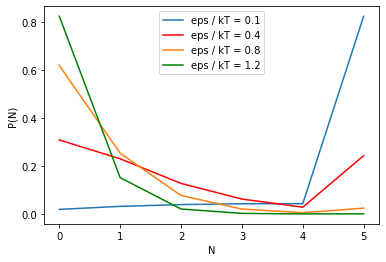

In [10]:
def Prob_distribution_2(eps):
    P_N=np.zeros(6)
    for ii in range(0,6):
        P_N[ii]=Probability_2(States,eps,ii)
    return P_N

fig, ax = plt.subplots()

ax.plot(range(0,6),Prob_distribution_2(0.1), label = "eps / kT = 0.1")
ax.plot(range(0,6),Prob_distribution_2(0.5), 'r', label = "eps / kT = 0.4")
ax.plot(range(0,6),Prob_distribution_2(0.8),  label = "eps / kT = 0.8")
ax.plot(range(0,6),Prob_distribution_2(1.2), 'g', label = "eps / kT = 1.2")
plt.ylabel("P(N)")
plt.xlabel("N")
leg = ax.legend();




# Part III

In [11]:
# #We need code to recover the peak of a probability distribution
# P_N_s=pd.Series(P_N)
# P_N_s.plot()
# plt.show()

# #This line should return the position where peaks occur.
# print('Peak position= '+str((P_N_s.index.values[np.r_[True, P_N[1:] > P_N[:-1]] & np.r_[P_N[:-1] > P_N[1:], True]])))

In [12]:
#We redefine our functions to accomodate vairable Es and Js
def energy_3(Test,eps,J_3):
    E=0
    for ii in range(0,len(Test)-1):
        E+=(-J_3*Test[ii]*Test[ii+1])+eps*Test[ii]
    return E-eps
def partition_3(States,eps,J_3):
    States['E'] = States.apply(lambda row : energy_3(row[0:7],eps,J_3), axis = 1)
    Energies=np.array(States['E'])
    Q=0
    for ii in range(0,len(Energies)):
        Q+=m.exp(-Energies[ii])
    return States,Q   
def Probability_3(States,eps,J_3,N):
    (E_states,Q)=partition_3(States,eps,J_3)
    Truncated=truncate(E_states,N)
    Energies=np.array(Truncated['E'])
    E_N=0
    for ii in range(0,len(Energies)):
        E_N+=m.exp(-Energies[ii])
    return E_N/Q

In [13]:
States

,0,1,2,3,4,5,6,E,N
0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-8.380870,0.0
1,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-5.980870,1.0
2,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.219130,1.0
3,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-3.580870,2.0
4,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.219130,1.0
5,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,1.180870,2.0
6,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.180870,2.0
7,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,-1.180870,3.0
8,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.219130,1.0
9,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.180870,2.0


In [14]:
#We need to find the number, position and magnitude of peaks 
#in our probability distribution P(N) for a grid of J and epsilon values.

#Values to explore
j_max=2
e_max=0.8
js=np.linspace(-0.1,j_max,30)
es=np.linspace(-0.04,e_max,30)

#Initialize empty dataframe to 
Peaks=pd.DataFrame(np.zeros([len(es),len(js)]))
tresh=0 #Threshold for finding peaks
for jj in range(0,len(js)):
    for ee in range(0,len(es)):
        P_N=np.zeros(6)
        for ii in range(0,6):
            P_N[ii]=Probability_3(States,es[ee],js[jj],ii)
        P_N_s=pd.Series(P_N)
        peak_locs=P_N_s.index.values[np.r_[True, P_N[1:] > tresh+P_N[:-1]] & np.r_[P_N[:-1] > tresh+P_N[1:], True]]
        peak_vals=np.array(P_N_s[np.r_[True, P_N[1:] > tresh+P_N[:-1]] & np.r_[P_N[:-1] > tresh+P_N[1:], True]])
        Peaks[jj][ee]=len(P_N_s.index.values[np.r_[True, P_N[1:] > tresh+P_N[:-1]] & np.r_[P_N[:-1] > tresh+P_N[1:], True]])
        if Peaks[jj][ee]==1:
            Peaks[jj][ee]+=((peak_locs==0)+2*(peak_locs==5))
        elif Peaks[jj][ee]==2:
            Peaks[jj][ee]+=(2*(peak_vals[0]>peak_vals[1])+3*(peak_vals[0]<peak_vals[1])+4*(peak_vals[0]==peak_vals[1]))

#We categorize different conditions using number values as shown below
#Values:
#Single peak: middle = 1, left = 2, right =3;
#Double peak: left peak higher = 4, right peak higher = 5, both equal = 6

No handles with labels found to put in legend.


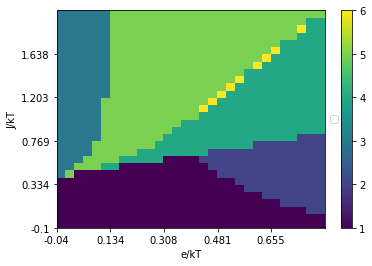

In [15]:
fig, ax = plt.subplots()
ax.pcolor(Peaks.T)
ax.set_xlabel('e/kT')
ax.set_ylabel('J/kT')
plt.xticks(range(0,len(es),6),np.round(es[0::6],3))
plt.yticks(range(0,len(js),6),np.round(js[0::6],3))
pos = ax.pcolor(Peaks.T)
plt.colorbar(pos,ax=ax)
legend_dict = { 'Single peak middle = 1' : 'purple','Single peak left = 2' : 'purple','Single peak right = 3' : 'purple','Double peak left high  = 4' : 'purple','Double peak right high = 5' : 'green','Double peak both equal = 6' : 'yellow', }
patchList = []
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

plt.legend(handles=patchList)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('legend.png', bbox_inches='tight')

plt.show()

# Part IV

In [24]:
#We want to eliminate all states where we go from -1 to 1 more than twice.
#This defines our accessible states
#We can find the number of interfaces as follows
def interface(State):
  N_interfaces=sum(np.abs(np.diff(State))/2)
  return N_interfaces
  
#Then we can eliminate all states that do not meet the accessibility requirement.
def accessible(States):
  States['Interfaces']=States.apply(lambda row : interface(row[0:7]), axis = 1)
  States=States[States['Interfaces']<=2]
  return States.drop(['Interfaces'],axis=1)

States=pd.DataFrame((np.zeros([32,7])));

States[[0,6]]=1;
jj=0
for ii in itertools.product([-1,1],repeat=5):
    States.loc[jj,1:5] = np.array(list(ii))
    jj=jj+1
States_acc=accessible(States)
States_acc.head()

,0,1,2,3,4,5,6
0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
1,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
3,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
7,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0
15,1.0,-1.0,1.0,1.0,1.0,1.0,1.0


In [25]:
# P_N_acc=np.zeros(6)
# for ii in range(0,6):
#     P_N_acc[ii]=Probability(States_acc,1.2,ii)
# plt.plot(range(0,6),P_N_acc)
# plt.plot(range(0,6),P_N)

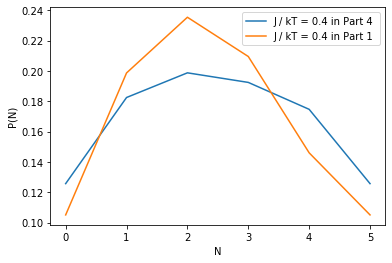

In [27]:
def Prob_distribution(J):
    P_N=np.zeros(6)
    for ii in range(0,6):
        P_N[ii]=Probability(States,J,ii)
    return P_N

def prob_accessible(J):
    P_N_acc=np.zeros(6)
    for ii in range(0,6):
        P_N_acc[ii]=Probability(States_acc,J,ii)
    return P_N_acc

# plt.plot(range(0,6),P_N_acc)
# plt.plot(range(0,6),P_N)

fig, ax = plt.subplots()
ax.plot(range(0,6),prob_accessible(0.4), label = "J / kT = 0.4 in Part 4 ")
ax.plot(range(0,6),Prob_distribution(0.4), label = "J / kT = 0.4 in Part 1")

plt.ylabel("P(N)")
plt.xlabel("N")
leg = ax.legend();

# Part V

In [19]:
#ATTENTION!!!!!!!!!!!!!!!

#PART V IS INCORRECT

# J_2=((7.2*10**(-2))*(3.7*10**(-10))**2)/(2*1000*1.38*10**(-23))
# def Mean_Val(x,y,e):
#   res=np.tanh(J_2*(x+y)-4*e)
#   return res

# def Mean_Val_sim(N_runs,e):
#   State=1*np.ones(5)
#   Temp=State
#   for ii in range(0,N_runs):
#     Temp[0]=Mean_Val(1,State[1],e)
#     Temp[1]=Mean_Val(State[0],State[2],e)
#     Temp[2]=Mean_Val(State[1],State[3],e)
#     Temp[3]=Mean_Val(State[2],State[4],e)
#     Temp[4]=Mean_Val(State[3],1,e)
#     State=Temp
#   return State

# Mean_Val_sim(10,0.001*J_2)

# Part VI

In [20]:
#To run an ising model, we need a function that calculates the energy of
#individual spot in our tube of 5 cells

#We also need functions that flip the state of a position and calculate the energy cost

def spot_energy(J,State,pos):
  return -J*(State[pos]*State[pos+1]+State[pos]*State[pos-1])+0.4*J*State[pos]

def flip(State,pos):
  flipped_state=State.copy()
  flipped_state[pos]=(-1*State[pos])
  return flipped_state

def cost(State,J):
  pos=np.random.randint(0,5)
  State_flip=flip(State,pos)
  delta_E=spot_energy(J,State_flip,pos)-spot_energy(J,State,pos)
  z=np.random.rand()
  if z<m.exp(-delta_E):
    return State_flip
  else:
    return State

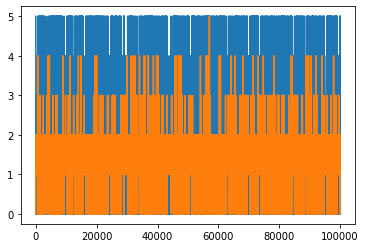

In [28]:
#Re-initialize our states dataframe
States=pd.DataFrame((np.zeros([32,7])));
States[[0,6]]=1;
States.head(32)
#Fill our dataframe with all possible flip configurations iteratively.
jj=0
for ii in itertools.product([-1,1],repeat=5):
    States.loc[jj,1:5] = np.array(list(ii))
    jj=jj+1

#Initialize Simulation values
runs=100000
J_6=1.2
Time=np.array(range(0,runs))
N=np.zeros(runs)
N_interfaces=np.zeros(runs)

#Choose starting state (31=full, 0=empty, np.random.randint(0,31)=random)
Start_state = np.array(States.iloc[31])

#Run simulation
Temp=Start_state
for ii in range(0,runs):
  Temp=cost(Temp,J_6)
  N[ii]=(sum(Temp)+3)/2
  N_interfaces[ii]=sum(np.abs(np.diff(Temp))/2)

#Plot the time evolution of occupation number and interface number
plt.plot(Time,N)
plt.plot(Time,N_interfaces);

Average N=2.21155


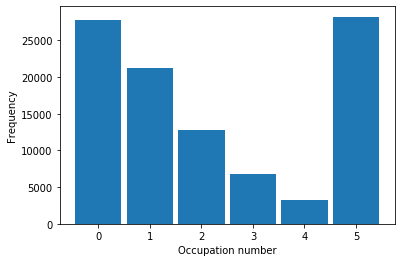

In [29]:
fig, ax = plt.subplots()
ax.hist(N,rwidth=0.9,bins=6,align='left',range=(0,6))
ax.set(xlabel='Occupation number',ylabel='Frequency');
print('Average N='+str(np.mean(N)))

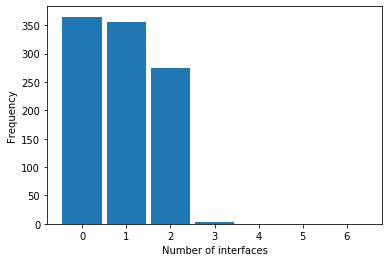

In [23]:
fig, ax = plt.subplots()
ax.hist(N_interfaces,rwidth=0.9,bins=7,align='left',range=(0,7))
ax.set(xlabel='Number of interfaces',ylabel='Frequency');